In [43]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'out.txt'
def acquire(dict,file):
    with open(file, 'r') as file:
        for i,line in enumerate(file):
            words = line.split()
            words = ' '.join(words)
            if "=" in words:
                time = words.split("=")[1]
            elif ":" in words:
                value = words.split(":")[1]
                dict[float(time)] = float(value)
    return dict

def plot(dict, name, lim, x):
    time = []
    values = []
    for key, value in dict.items():
        time.append(key)
        values.append(value)
    plt.plot(time, values, linestyle='-')
    plt.xlabel('Time')
    plt.title(name)
    plt.grid(True)
    if(lim):
        plt.xlim(0, x)
    plt.show()
def plot_all_completion(dict1,dict2):
    time = []
    values = []
    values_2 = []
    for key, value in dict1.items():
        time.append(key)
        values.append(value)
    for _, value in dict2.items():
        values_2.append(value)
    fig, ax = plt.subplots()
    ax.plot(time, values, label='Process 1 completion time', linestyle='-',  color='blue')
    ax.plot(time, values_2, label='Process 2 completion time', linestyle='-',  color='red')
    ax.set_xlabel('Time')
    ax.set_title('Both Process completion time')
    ax.legend()
def plot_all_utilization(dict1,dict2,dict3,dict4, lim, x):
    time = []
    values = []
    values_2 = []
    values_3 = []
    values_4 = []
    for key, value in dict1.items():
        time.append(key)
        values.append(value)
    for _, value in dict2.items():
        values_2.append(value)
    for _, value in dict3.items():
        values_3.append(value)
    for _, value in dict4.items():
        values_4.append(value)
    fig, ax = plt.subplots()
    ax.plot(time, values, label='Main CPU Transition for Pr1', linestyle='-',  color='blue')
    ax.plot(time, values_2, label='Secondary CPU Transition for Pr1', linestyle='-',  color='red')
    ax.plot(time, values_3, label='Main CPU Transition for Pr2', linestyle='-',  color='yellow')
    ax.plot(time, values_4, label='Secondary CPU Transition for Pr2', linestyle='-',  color='green')
    ax.set_xlabel('Time')
    if(lim):
        plt.xlim(0, x)
    ax.set_title('Utilization Rate of CPU Transitions')
    ax.legend()

In [44]:
Pr1_End = {}
Pr2_End = {}
T0_Util = {}
T2_Util = {}
T3_Util = {}
T4_Util = {}
Pr1_End = acquire(Pr1_End,"out.txt")
Pr2_End = acquire(Pr2_End,"pr2.txt")
T0_Util = acquire(T0_Util,"t0.txt")
T2_Util = acquire(T2_Util,"t2.txt")
T3_Util = acquire(T3_Util,"t3.txt")
T4_Util = acquire(T4_Util,"t4.txt")

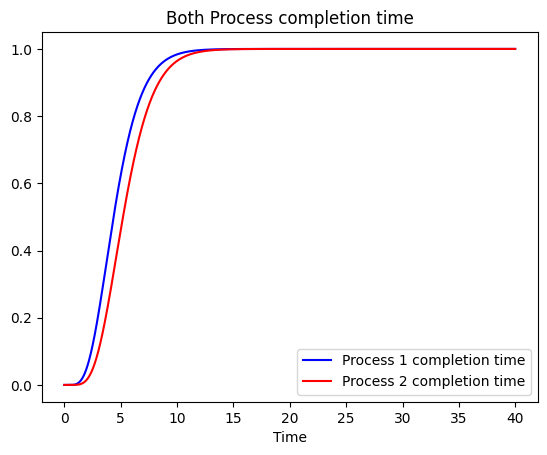

In [45]:
plot_all_completion(Pr1_End,Pr2_End)

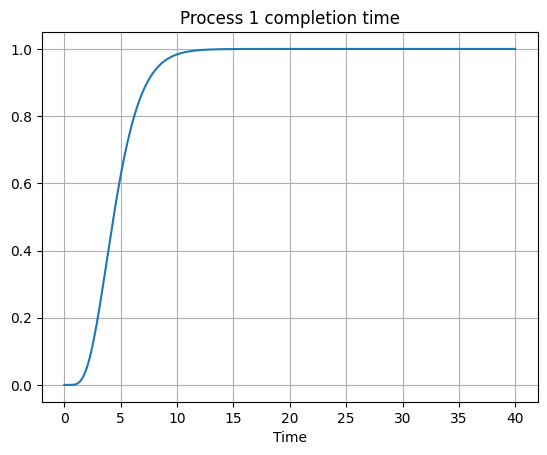

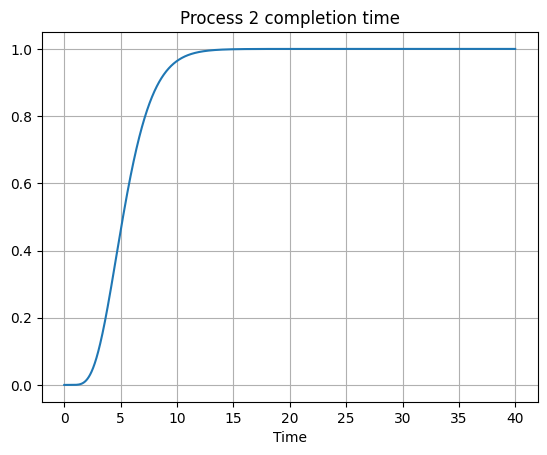

In [46]:
plot(Pr1_End, "Process 1 completion time", False, None)
plot(Pr2_End, "Process 2 completion time", False, None)

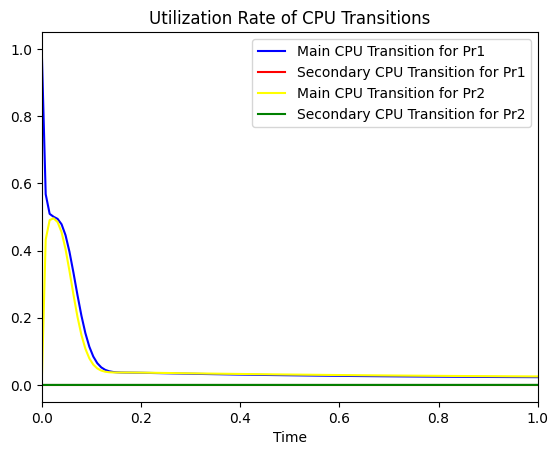

In [52]:
plot_all_utilization(T0_Util,T3_Util,T4_Util,T2_Util, True, 1)

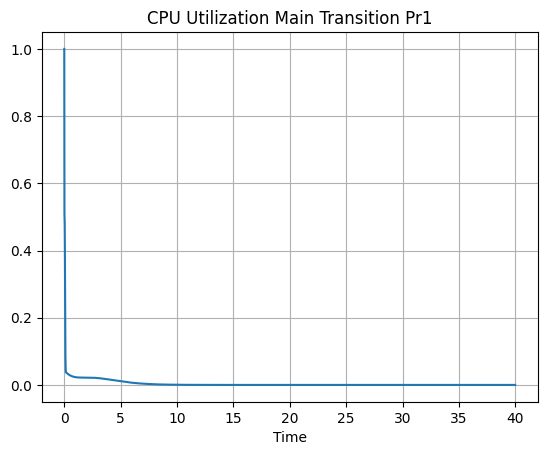

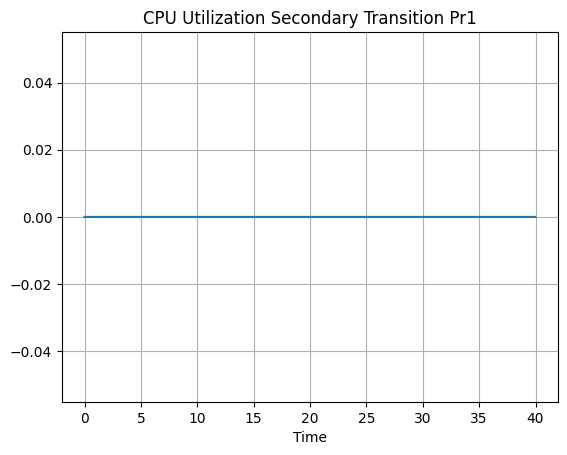

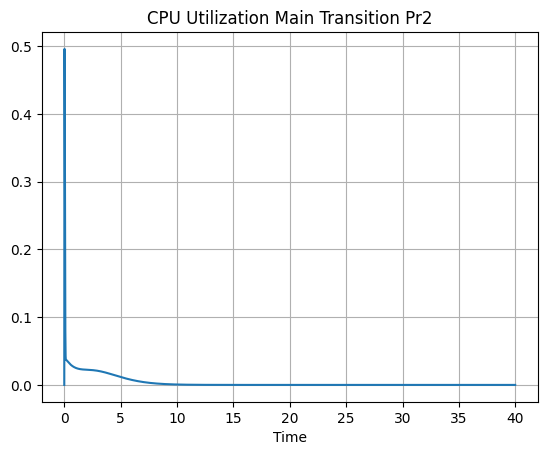

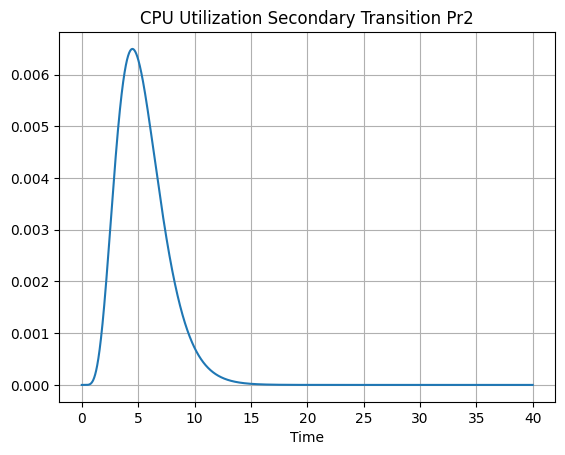

In [54]:
plot(T0_Util, "CPU Utilization Main Transition Pr1", False, 20)
plot(T3_Util, "CPU Utilization Secondary Transition Pr1", False, 20)

plot(T4_Util, "CPU Utilization Main Transition Pr2", False, 20)
plot(T2_Util, "CPU Utilization Secondary Transition Pr2", False, 20)

In [56]:
cpu_util = {}

for d in [T0_Util, T2_Util, T3_Util, T4_Util]:
    for key, value in d.items():
        if key in cpu_util:
            cpu_util[key] += float(value)
        else:
            cpu_util[key] = float(value)

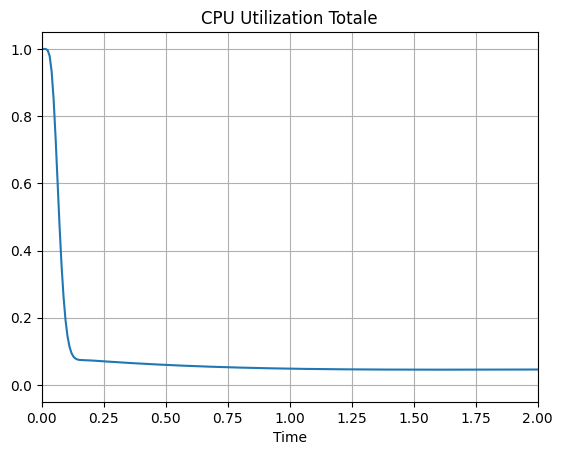

In [57]:
plot(cpu_util, "CPU Utilization Totale",True, 2) 